In [2]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# Just get 1000 data points and only the text columns

In [3]:
import torch
import numpy as np

In [4]:
torch.version.cuda

'11.7'

In [63]:
# key_word = ['very','pleasant'] #
# pattern = '|'.join(key_word)
# data['check'] = data['TEXT'].str.contains(pattern)
# data.check.value_counts()

## 1: Doc_to_vec

In [5]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /home/gwan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
sentences = train.text.values
tokenized_sent = []

for s in sentences:
    tokenized_sent.append(word_tokenize(s.lower()))
print(tokenized_sent[0])

['full', 'code', 'nkda', '55', 'y', 'o', 'f', 'with', 'morbid', 'obesity', 'and', 'htn', 'no', 'recent', 'medical', 'care', 'admitted', 'to', 'hospital1', 'ed', 'on', '1', '2', 'w', 'ftt', 'and', 'somnolence', 'found', 'to', 'have', 'large', 'stage', 'iv', 'pressure', 'ulcers', 'on', 'rlq', 'and', 'ru', 'thigh', 'wounds', 'first', 'debrided', 'by', 'plastic', 'doctor', 'first', 'name', 'in', 'ed', 'admitted', 'to', 'hospital', 'unit', 'name', '4', 'with', 'transient', 'hypotension', 'lethargy', 'and', 'nursing', 'wound', 'care', 'issues', 'decubitus', 'ulcer', 'present', 'at', 'admission', 'assessment', 'continues', 'with', 'increased', 'eschar', 'on', 'rlq', 'malodorous', 'other', 'abdominal', 'wounds', 'improved', 'occasionally', 'bleeding', 'seen', 'by', 'plastics', 'dr', 'last', 'name', 'stitle', '11562', 'this', 'am', 'beeper', 'numeric', 'identifier', '11563', 'who', 'recommended', 'tid', 'dressing', 'changes', 'to', 'rlq', 'area', 'xeroform', 'gauze', 'placed', 'by', 'plastics',

In [7]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_sent)]

In [8]:
model_d2v = Doc2Vec(tagged_data, vector_size = 200, window = 2, min_count = 10, epochs = 100)

'''
vector_size = Dimensionality of the feature vectors.
window = The maximum distance between the current and predicted word within a sentence.
min_count = Ignores all words with total frequency lower than this.
alpha = The initial learning rate.
'''

'\nvector_size = Dimensionality of the feature vectors.\nwindow = The maximum distance between the current and predicted word within a sentence.\nmin_count = Ignores all words with total frequency lower than this.\nalpha = The initial learning rate.\n'

In [9]:
data_train = train.copy()
data_train['tokens'] = tokenized_sent

In [10]:
data_train['emb'] = data_train['tokens'].apply(model_d2v.infer_vector)

In [11]:
data_train.head()

,id,text,annotation,tokens,emb
0,723896,full code nkda 55 y o f with morbid obesity an...,1,"[full, code, nkda, 55, y, o, f, with, morbid, ...","[0.26295832, 0.011248917, 1.6407872, 0.5980760..."
1,1853831,nursing nicu note 1 respiratory o pt remains i...,0,"[nursing, nicu, note, 1, respiratory, o, pt, r...","[0.08174397, -0.87000173, 0.06789715, 0.080320..."
2,1405842,ccu nursing progress note s i would like to ge...,1,"[ccu, nursing, progress, note, s, i, would, li...","[0.53284323, -1.7147696, 0.5414482, -0.2807709..."
3,1573658,ccu nursing progress note s i still feel alitt...,1,"[ccu, nursing, progress, note, s, i, still, fe...","[-0.2313523, -1.8485368, -1.0289205, 0.5885449..."
4,34910,admission date 2135 12 23 discharge date 2135 ...,0,"[admission, date, 2135, 12, 23, discharge, dat...","[0.6677951, -1.1999754, -2.059161, 0.44401428,..."


## Transfomer 

In [12]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('TimKond/S-BioLinkBert-MedQuAD')

2022-10-21 14:14:05.458267: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-21 14:14:05.612362: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-21 14:14:05.639363: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-21 14:14:06.135575: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [13]:
embeddings = model.encode(sentences)
print(embeddings)

[[-0.036536    0.33835596  0.51994896 ... -0.03700165  0.13714871
  -0.07030044]
 [ 0.03993022  0.20294327  0.14775896 ... -0.1941382   0.5970359
  -0.0982073 ]
 [-0.15195133  0.33885583  0.4040655  ... -0.18028194  0.08391595
  -0.1527898 ]
 ...
 [ 0.16496503  0.17573677 -0.01575199 ... -0.19569075  1.0492783
  -0.08215071]
 [ 0.02255729  0.2097973   0.08416966 ... -0.19114912  0.81562406
  -0.07332124]
 [ 0.01963929  0.25955972  0.35870165 ... -0.06745666  0.3448465
  -0.04506941]]


## Clustering based on embeddings

In [14]:
from nltk.cluster import KMeansClusterer
import nltk

def clustering_question(data,emb_col,NUM_CLUSTERS = 2):

    X = np.array(data[emb_col].tolist())

    kclusterer = KMeansClusterer(
        NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance,
        repeats=25,avoid_empty_clusters=True)

    assigned_clusters = kclusterer.cluster(X, assign_clusters=True)

    data['cluster'] = pd.Series(assigned_clusters, index=data.index)
    data['centroid'] = data['cluster'].apply(lambda x: kclusterer.means()[x])

    return data

In [15]:
result_d2v = clustering_question(data_train,'emb')

In [16]:
result_d2v.groupby(["cluster", "annotation"]).size()

cluster  annotation
0        0             105
         1              30
1        0             258
         1              32
dtype: int64

In [18]:
data_train['emb_transformer'] = data_train['text'].apply(model.encode)

In [19]:
result_trans = clustering_question(data_train,'emb_transformer')

In [20]:
result_trans.groupby(["cluster", "annotation"]).size()

cluster  annotation
0        0             204
         1              45
1        0             159
         1              17
dtype: int64

In [21]:
# Apprerantly Very simple embeddings clustering based on doc2vec or BERT does not tell anything about the sentiment

# BERT

In [5]:
import torch
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax



In [6]:
task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

In [7]:
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)

In [ ]:
labels = ['positive','neutral','negative']

In [25]:
test

,id,text,annotation
0,1908153,npn npn 1 remains nco2 200cc flow mostly 21 25...,1
1,1766352,dol 60 cga 36 5 28 wks cvr remains ra spells h...,0
2,696200,84 year old woman cad p cabg w stent chf dm ad...,0
3,599709,hpi 37 yo male bicylist struck car tx scene lo...,0
4,1673127,see name6 md 66 data md notes orders neuro int...,0
...,...,...,...
102,29207,admission date 2193 1 19 discharge date 2193 2...,0
103,622046,renal failure acute acute renal failure arf as...,0
104,2063891,npn 6 2083 2 infant conts ra rr 40 70 ls cl mi...,0
105,1703462,npn 0700 1900 addendum 3 fen infant tolerating...,0


In [30]:
positive = []
netural = []
negative = []

In [35]:
from copy import error


for i,row in test.iterrows():
    try:
        encoded_input = tokenizer(row['text'], return_tensors='pt')
        output = model(**encoded_input)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        positive.append(scores[0])
        netural.append(scores[1])
        negative.append(scores[2])
    except:
        positive.append(1/3)
        netural.append(1/3)
        negative.append(1/3)
        print(i)

# ranking = np.argsort(scores)
# ranking = ranking[::-1]
# for i in range(scores.shape[0]):
#     l = labels[ranking[i]]
#     s = scores[ranking[i]]
#     print(f"{i+1}) {l} {np.round(float(s), 4)}")

9
15
30
35
38
39
46
49
52
68
76
78


In [28]:
test.iloc[39]

array([0.02507626, 0.71849334, 0.25643042], dtype=float32)

In [ ]:
test.iloc[40]

1) neutral 0.7185
2) negative 0.2564
3) positive 0.0251


# Supervised Neural Methods

In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import torch.nn as nn
import torch.nn.functional as F
from nltk.corpus import stopwords 
from collections import Counter
import string
import re
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def tokenize(x_train,y_train,x_val,y_val):
    word_list = []

    stop_words = set(stopwords.words('english')) 
    for sent in x_train:
        for word in sent.lower().split():
            if word not in stop_words and word != '':
                word_list.append(word)
  
    corpus = Counter(word_list)
    # sorting on the basis of most common words
    corpus_ = sorted(corpus,key=corpus.get,reverse=True)[:5000]
    # creating a dict
    onehot_dict = {w:i+1 for i,w in enumerate(corpus_)}
    
    # tockenize
    final_list_train,final_list_test = [],[]
    for sent in x_train:
            final_list_train.append([onehot_dict[word] for word in sent.lower().split() 
                                     if word in onehot_dict.keys()])
    for sent in x_val:
            final_list_test.append([onehot_dict[word] for word in sent.lower().split() 
                                    if word in onehot_dict.keys()])
            
    encoded_train = [1 if label == True else 0 for label in y_train]  
    encoded_test = [1 if label == False else 0 for label in y_val] 
    return np.array(final_list_train), np.array(encoded_train),np.array(final_list_test), np.array(encoded_test),onehot_dict

In [28]:
x_train,x_test,y_train,y_test = train['text'].values,test['text'].values,train['annotation'].values,test['annotation'].values
print(f'shape of train data is {x_train.shape}')
print(f'shape of test data is {x_test.shape}')

shape of train data is (425,)
shape of test data is (107,)


[nltk_data] Downloading package stopwords to /home/gwan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
x_train,y_train,x_test,y_test,vocab = tokenize(x_train,y_train,x_test,y_test)

/tmp/ipykernel_24720/4037790089.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(final_list_train), np.array(encoded_train),np.array(final_list_test), np.array(encoded_test),onehot_dict


In [31]:
print(f'Length of vocabulary is {len(vocab)}')

Length of vocabulary is 5000


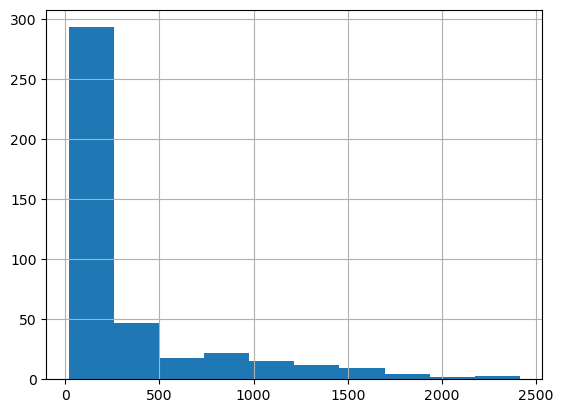

count     425.000000
mean      350.628235
std       433.580995
min        20.000000
25%       114.000000
50%       171.000000
75%       321.000000
max      2413.000000
dtype: float64

In [32]:
rev_len = [len(i) for i in x_train]
pd.Series(rev_len).hist()
plt.show()
pd.Series(rev_len).describe()

In [33]:
def padding_(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:seq_len]
    return features

In [34]:
x_train_pad = padding_(x_train,2000)
x_test_pad = padding_(x_test,2000)

In [35]:
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(x_train_pad), torch.from_numpy(y_train))
valid_data = TensorDataset(torch.from_numpy(x_test_pad), torch.from_numpy(y_test))

# dataloaders
batch_size = 32

# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)

# Actutal Modelling

In [46]:
class TextClassificationModel(nn.Module):

    def __init__(self, vocab_size, embed_dim, num_class):
        super(TextClassificationModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=True)
        self.fc = nn.Linear(embed_dim, num_class)
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, text, offsets):
        embedded = self.embedding(text, offsets)
        return self.fc(embedded)

In [47]:
num_class = len(set([label for (label, text) in train_loader]))
vocab_size = len(vocab)
emsize = 64
model = TextClassificationModel(vocab_size, emsize, num_class).to(device)

In [51]:
import time

def train(dataloader):
    model.train()
    total_acc, total_count = 0, 0
    log_interval = 500
    start_time = time.time()

    for idx, (label, text, offsets) in enumerate(dataloader):
        optimizer.zero_grad()
        predicted_label = model(text, offsets)
        loss = criterion(predicted_label, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)
        optimizer.step()
        total_acc += (predicted_label.argmax(1) == label).sum().item()
        total_count += label.size(0)
        if idx % log_interval == 0 and idx > 0:
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches '
                  '| accuracy {:8.3f}'.format(epoch, idx, len(dataloader),
                                              total_acc/total_count))
            total_acc, total_count = 0, 0
            start_time = time.time()
def evaluate(dataloader):
    model.eval()
    total_acc, total_count = 0, 0

    with torch.no_grad():
        for idx, (label, text, offsets) in enumerate(dataloader):
            predicted_label = model(text, offsets)
            loss = criterion(predicted_label, label)
            total_acc += (predicted_label.argmax(1) == label).sum().item()
            total_count += label.size(0)
    return total_acc/total_count

In [52]:
# loss and optimization functions
# Hyperparameters
EPOCHS = 10 # epoch
LR = 5  # learning rate
BATCH_SIZE = 64 # batch size for training

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)

In [53]:
import time
for epoch in range(1, EPOCHS + 1):
    epoch_start_time = time.time()
    train(train_loader)
    accu_val = evaluate(valid_loader)
    if total_accu is not None and total_accu > accu_val:
      scheduler.step()
    else:
       total_accu = accu_val
    print('-' * 59)
    print('| end of epoch {:3d} | time: {:5.2f}s | '
          'valid accuracy {:8.3f} '.format(epoch,
                                           time.time() - epoch_start_time,
                                           accu_val))
    print('-' * 59)

ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
fig = plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_tr_acc, label='Train Acc')
plt.plot(epoch_vl_acc, label='Validation Acc')
plt.title("Accuracy")
plt.legend()
plt.grid()
    
plt.subplot(1, 2, 2)
plt.plot(epoch_tr_loss, label='Train loss')
plt.plot(epoch_vl_loss, label='Validation loss')
plt.title("Loss")
plt.legend()
plt.grid()

plt.show()

In [ ]:
def predict_text(text):
        word_seq = np.array([vocab[word] for word in text.split() 
                         if word in vocab.keys()])
        word_seq = np.expand_dims(word_seq,axis=0)
        pad =  torch.from_numpy(padding_(word_seq,500))
        inputs = pad.to(device)
        batch_size = 1
        h = model.init_hidden(batch_size)
        h = tuple([each.data for each in h])
        output, h = model(inputs, h)
        return(output.item())